<a href="https://colab.research.google.com/github/robertoalotufo/rnap/blob/master/PyTorch/LogisticRegressionMNIST_SGD_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Softmax com dados do MNIST com SGD e dados de validação

O objetivo deste notebook é ilustrar 
- o uso de dados de validação
- laço de validação após laço de treinamento


## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 50

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = './data/'

dataset_train_orig = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())
dataset_valid_orig = MNIST(dataset_dir, train=False, download=True,
                      transform=torchvision.transforms.ToTensor())
len(dataset_train_orig), len(dataset_valid_orig)

(60000, 10000)

### Usando apenas 2000 amostras de treinamento e 400 de validação

In [4]:
dataset_train,_ = torch.utils.data.random_split(dataset_train_orig, [2000,58000])
dataset_valid,_ = torch.utils.data.random_split(dataset_valid_orig, [400,9600])

In [5]:
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
loader_valid = DataLoader(dataset_valid, batch_size=batch_size)

print('Número de minibatches de trenamento e validação:', 
      len(loader_train), len(loader_valid))

Número de minibatches de trenamento e validação: 40 8


In [6]:
x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))


Dimensões dos dados de um minibatch: torch.Size([50, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


In [7]:
import torchvision as tv
f_tensor2PIL = tv.transforms.ToPILImage()

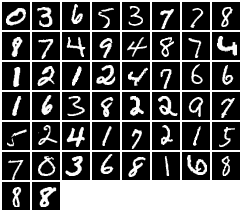

In [8]:
mosaic = tv.utils.make_grid(x_train[:100],padding=2, pad_value=1)
f_tensor2PIL(mosaic)

In [9]:
print(y_train[:100])

tensor([0, 3, 6, 5, 3, 7, 7, 8, 8, 7, 4, 9, 4, 8, 7, 4, 1, 2, 1, 2, 4, 7, 6, 6,
        1, 6, 3, 8, 2, 2, 9, 7, 5, 2, 4, 1, 7, 2, 1, 5, 7, 0, 3, 6, 8, 1, 6, 8,
        8, 8])


## Modelo

In [10]:
model = torch.nn.Linear(28*28, 10)


## Treinamento

### Inicialização dos parâmetros

In [11]:
n_epochs = 50
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [13]:
losses_train = []
losses_valid = []

total_trained_samples = 0
for i in range(n_epochs):
    # Laço de treinamento
    model.train()
    for x_train, y_train in loader_train:
        # Transforma a entrada para uma dimensão
        inputs = x_train.reshape(-1, 28 * 28)
        # predict da rede
        logits = model(inputs)

        # calcula a perda
        loss_train = criterion(logits, y_train)

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
    losses_train.append(loss_train.item())
    model.eval()
    with torch.no_grad():
        for x_valid, y_valid in loader_valid:
            inputs = x_valid.reshape(-1, 28 * 28)
            logits = model(inputs)
            loss_valid = criterion( logits, y_valid)
    losses_valid.append(loss_valid.item())
    print('Época: {:d}/{:d} Loss train:{:f} Loss valid:{:f}'
        .format(i,n_epochs-1, loss_train.item(), loss_valid.item()))


Época: 0/49 Loss train:0.348504 Loss valid:0.372552
Época: 1/49 Loss train:0.228301 Loss valid:0.359907
Época: 2/49 Loss train:0.323238 Loss valid:0.311812
Época: 3/49 Loss train:0.304259 Loss valid:0.320289
Época: 4/49 Loss train:0.242689 Loss valid:0.303159
Época: 5/49 Loss train:0.189782 Loss valid:0.297723
Época: 6/49 Loss train:0.214955 Loss valid:0.297460
Época: 7/49 Loss train:0.092442 Loss valid:0.289402
Época: 8/49 Loss train:0.117238 Loss valid:0.300637
Época: 9/49 Loss train:0.216195 Loss valid:0.299041
Época: 10/49 Loss train:0.176201 Loss valid:0.287505
Época: 11/49 Loss train:0.137343 Loss valid:0.279131
Época: 12/49 Loss train:0.100330 Loss valid:0.288761
Época: 13/49 Loss train:0.173970 Loss valid:0.280006
Época: 14/49 Loss train:0.252982 Loss valid:0.267881
Época: 15/49 Loss train:0.120040 Loss valid:0.268506
Época: 16/49 Loss train:0.178588 Loss valid:0.263432
Época: 17/49 Loss train:0.148075 Loss valid:0.270424
Época: 18/49 Loss train:0.101070 Loss valid:0.263865
Épo

In [14]:
print('Final loss:', loss_train.item(), loss_valid.item())

Final loss: 0.06842944771051407 0.23286312818527222


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

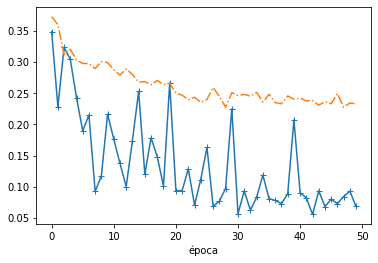

In [16]:
plt.plot(np.arange(len(losses_valid)), losses_train,'-+',
         np.arange(len(losses_valid)), losses_valid,'-.')

plt.xlabel('época')

# Atividades

## Perguntas

1. Qual seria um possível critério de parada do treinamento?
2. Por que no laço de validação utiliza-se o torch_nograd(), não seria suficiente usar apenas o model.eval()?
2. Seria possível fazer validação apenas a cada 3 épocas? Modifique o código para fazer isso.

## Conclusões sobre os experimentos deste notebook
